# Insurance Fraud Detection using Random Forest, Decision Tree Classifier, Logistic Regression, KNN, and SVC

## Introduction

Machine Learning is commonly used in various trade circles to automate processes, gather insights on business, and speed up processes. You will use Python to study the usage of Machine Learning in real-life scenarios - how Machine Learning actually impacts businesses. 

Insurance fraud is a very big and important problem. There are a variety of frauds that keep occuring. Some of them are common. Thus, predicting them beforehand can save a large amount of money. As always, Machine Learning can help us in this case. 

## Goals
The goal is to find the best method from classification machine learning to detect insurance fraud, we can see there are underfitting or overfitting in those data and we can see with the score of each method.

## Context

We will be working with auto insurance claim data, obtained from [Kaggle](https://www.kaggle.com/buntyshah/auto-insurance-claims-data).

## Import Libraries


In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Read the CSV file

In [2]:
df = pd.read_csv(r'[Dataset]_Module11_(Insurance).csv')
df.head()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [3]:
#We are checking number of null values for various features
df.isnull().sum()

Unnamed: 0                                0
capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
                                         ..
policy_annual_premium_groups_high         0
policy_annual_premium_groups_low          0
policy_annual_premium_groups_medium       0
policy_annual_premium_groups_very high    0
policy_annual_premium_groups_very low     0
Length: 69, dtype: int64

In [4]:
#Let us get some more info about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              1000 non-null   int64
 1   capital-gains                           1000 non-null   int64
 2   capital-loss                            1000 non-null   int64
 3   incident_hour_of_the_day                1000 non-null   int64
 4   number_of_vehicles_involved             1000 non-null   int64
 5   witnesses                               1000 non-null   int64
 6   total_claim_amount                      1000 non-null   int64
 7   fraud_reported                          1000 non-null   int64
 8   insured_sex_FEMALE                      1000 non-null   int64
 9   insured_sex_MALE                        1000 non-null   int64
 10  insured_occupation_adm-clerical         1000 non-null   int64
 11  insured_occupation

## Display information about the dataset using the describe function

In [5]:
df.describe()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.0000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,25126.100000,-26793.700000,11.644000,1.83900,1.487000,52761.94000,0.247000,0.537000,0.463000,...,0.080000,0.043000,0.04200,0.047000,0.1020,0.153000,0.151000,0.69300,0.001000,0.002000
std,288.819436,27872.187708,28104.096686,6.951373,1.01888,1.111335,26401.53319,0.431483,0.498879,0.498879,...,0.271429,0.202959,0.20069,0.211745,0.3028,0.360168,0.358228,0.46148,0.031623,0.044699
min,0.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,100.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,249.750000,0.000000,-51500.000000,6.000000,1.00000,1.000000,41812.50000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,499.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,58055.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,749.250000,51025.000000,0.000000,17.000000,3.00000,2.000000,70592.50000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
max,999.000000,100500.000000,0.000000,23.000000,4.00000,3.000000,114920.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
#Fraud_reported is the target column. Let us check its unique values
df['fraud_reported'].unique()

array([1, 0], dtype=int64)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

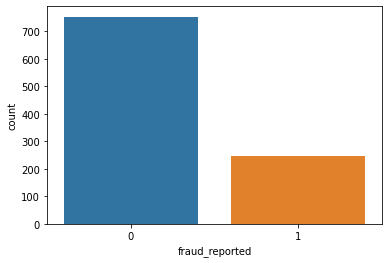

In [7]:
#Here we are seeing the distribution of 0s and 1s in fraud_reported column
sns.countplot(df['fraud_reported'])

## Checking correlation between features

Here we are using the plotly library for plotting the correlation diagram.

A correlation matrix is a table that shows the relation between variables - how one variable changes when another variable is changed. If there are 5 variables, the correlation matrix will have 5 times 5 or 25 entries, where each entry shows the correlation between two variables.

The accuracy of a machine learning algorithm is a measure of how well the algorithm is performing - how often the algorithm classifies a data point correctly. Accuracy is given by:

![Accuracy](https://miro.medium.com/max/1050/1*O5eXoV-SePhZ30AbCikXHw.png)

Precision means the % of the results that are relevant, while recall refers to the % of total relevant results correctly classified by an algorithm. 

![Precision and Recall](https://miro.medium.com/max/1050/1*pOtBHai4jFd-ujaNXPilRg.png)

True positive: The model correctly predicts the positive class. 

True negative: The model correctly predicts the negative class.

False positive: The model incorrectly predicts the positive class. 

False negative: The model incorrectly predicts the negative class.


We will be using the plotly library. <br>
If you do not have the library installed, please do the below step in your terminal: <br>
pip install plotly

In [8]:
! pip install plotly

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [9]:
import plotly.express as px
import plotly.graph_objects as go

#getting the correlation matrix using corr() function of pandas
corr_matrix = df.corr()

fig = go.Figure(data = go.Heatmap(
                                z = corr_matrix.values,
                                x = list(corr_matrix.columns),
                                y = list(corr_matrix.index)))

fig.update_layout(title = 'Correlation_Insurance_Fraud')

fig.show()

In [10]:
# split the data to X and y
features = []
for col in df.columns:
    if col != 'fraud_reported':
        features.append(col)

target = 'fraud_reported'

X = df[features]
y = df[target]

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
#We are splitting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

### Predict the training data using the Random Forest Classifier and store the result in a variable preds
To identify whether this model will result in overfitting or not, we can see accuracy from y_train and y_train_pred (from predicting with X_train) and y_test and preds (from predicting with X_test )


In [13]:
from sklearn.ensemble import RandomForestClassifier         #import model
rfc = RandomForestClassifier(random_state = 1)              
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [14]:
# predict y_train_pred with X_train
y_train_pred = rfc.predict(X_train)

In [15]:
# display classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       573
           1       1.00      1.00      1.00       177

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [16]:
preds = rfc.predict(X_test)

In [17]:
score = rfc.score(X_test, y_test)
print('score:', score*100)
print()
print(classification_report(y_test, preds))


score: 83.6

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       180
           1       0.76      0.60      0.67        70

    accuracy                           0.84       250
   macro avg       0.81      0.76      0.78       250
weighted avg       0.83      0.84      0.83       250



In [18]:
# display confusion matrix
cm_rfc = confusion_matrix(y_test, preds)
cm_rfc

array([[167,  13],
       [ 28,  42]], dtype=int64)

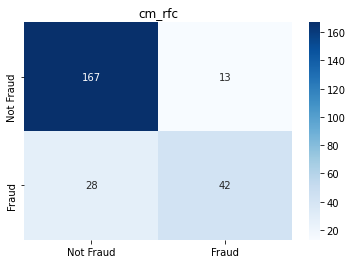

In [19]:
# display confusion matrix with dataframe
cm_rfc = pd.DataFrame(cm_rfc)

cm_rfc = sns.heatmap(cm_rfc, cmap='Blues', annot=True, fmt='' ,xticklabels=['Not Fraud','Fraud'], yticklabels=['Not Fraud','Fraud']).set(title='cm_rfc')

### You have seen the result from a Random Forest Classifier. Now try to fit the data using a Decision Tree Classifier
To identify whether this model will result in overfitting or not, we can see accuracy from y_train and y_train_pred_dtc (from predict with x_train) and y_test and preds_dtc (from predict with x_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [21]:
y_train_pred_dtc = dtc.predict(X_train)

In [22]:
# display classification report
print(classification_report(y_train, y_train_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       573
           1       1.00      1.00      1.00       177

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [23]:
preds_dtc = dtc.predict(X_test)

In [24]:
score = dtc.score(X_test, y_test)
print('score:', 100*score)
print()
print(classification_report(y_test, preds_dtc))

score: 77.2

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       180
           1       0.60      0.54      0.57        70

    accuracy                           0.77       250
   macro avg       0.72      0.70      0.71       250
weighted avg       0.77      0.77      0.77       250



In [25]:
# display confusion matrix
cm_dtc = confusion_matrix(y_test, preds_dtc)
cm_dtc

array([[155,  25],
       [ 32,  38]], dtype=int64)

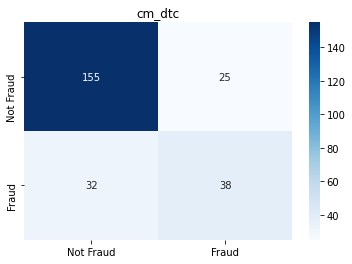

In [26]:
# display confusion matrix with dataframe
cm_dtc = pd.DataFrame(cm_dtc)

cm_dtc = sns.heatmap(cm_dtc, cmap='Blues', annot=True, fmt='' ,xticklabels=['Not Fraud','Fraud'], yticklabels=['Not Fraud','Fraud']).set(title='cm_dtc')

### You have seen the result from a Decision Tree Classifier. Now try to fit the data using a Logistic Regression Classifier
To identify whether this model will result in overfitting or not, we can see accuracy from y_train and y_train_pred_lr (from predict with x_train) and y_test and preds_lr (from predict with x_test)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_train_pred_lr = lr.predict(X_train)

In [29]:
# display classification report
print(classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       573
           1       0.67      0.64      0.66       177

    accuracy                           0.84       750
   macro avg       0.78      0.77      0.78       750
weighted avg       0.84      0.84      0.84       750



In [30]:
preds_lr = lr.predict(X_test)

In [31]:
score = lr.score(X_test, y_test)
print('score:', 100*score)
print()
print(classification_report(y_test, preds_lr))

score: 84.0

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       180
           1       0.80      0.57      0.67        70

    accuracy                           0.84       250
   macro avg       0.82      0.76      0.78       250
weighted avg       0.84      0.84      0.83       250



In [32]:
cm_lr = confusion_matrix(y_test, preds_lr)
cm_lr

array([[170,  10],
       [ 30,  40]], dtype=int64)

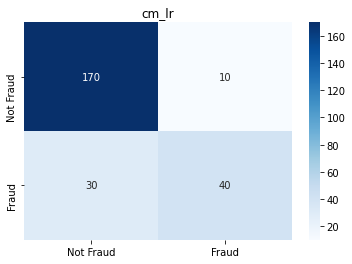

In [33]:
# display confusion matrix with dataframe
cm_lr = pd.DataFrame(cm_lr)

cm_lr = sns.heatmap(cm_lr, cmap='Blues', annot=True, fmt='' ,xticklabels=['Not Fraud','Fraud'], yticklabels=['Not Fraud','Fraud']).set(title='cm_lr')

### You have seen the result from a Decision Tree Classifier. Now try to fit the data using a K-Nearest Neighbor Classifier
To identify whether this model will result in overfitting or not, we can see accuracy from y_train and y_train_pred_knn (from predict with x_train) and y_test and preds_knn (from predict with x_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_train_pred_knn = knn.predict(X_train)

In [36]:
# display classification report
print(classification_report(y_train, y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       573
           1       0.77      0.44      0.56       177

    accuracy                           0.84       750
   macro avg       0.81      0.70      0.73       750
weighted avg       0.83      0.84      0.82       750



In [37]:
preds_knn = knn.predict(X_test)

In [38]:
score = knn.score(X_test, y_test)
print('score:', 100*score)
print()
print(classification_report(y_test, preds_knn))

score: 74.4

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       180
           1       0.59      0.27      0.37        70

    accuracy                           0.74       250
   macro avg       0.68      0.60      0.61       250
weighted avg       0.72      0.74      0.71       250



In [39]:
cm_knn = confusion_matrix(y_test, preds_knn)
cm_knn

array([[167,  13],
       [ 51,  19]], dtype=int64)

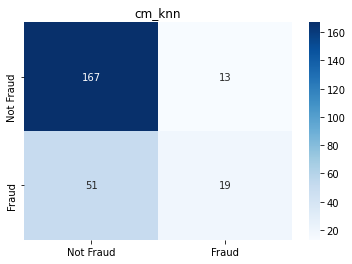

In [40]:
# display confusion matrix with dataframe
cm_knn = pd.DataFrame(cm_knn)

cm_knn = sns.heatmap(cm_knn, cmap='Blues', annot=True, fmt='' ,xticklabels=['Not Fraud','Fraud'], yticklabels=['Not Fraud','Fraud']).set(title='cm_knn')

### You have seen the result from K-Nearest Neighbor. Now try to fit the data using a SVC 
To identify whether this model will result in overfitting or not, we can see accuracy from y_train and y_train_pred_svc (from predict with x_train) and y_test and preds_svc (from predict with x_test)

In [41]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train, y_train)

SVC()

In [42]:
y_train_pred_svc = svc.predict(X_train)

In [43]:
# display classification report
print(classification_report(y_train, y_train_pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       573
           1       0.89      0.87      0.88       177

    accuracy                           0.94       750
   macro avg       0.93      0.92      0.92       750
weighted avg       0.94      0.94      0.94       750



In [44]:
preds_svc = svc.predict(X_test)

In [45]:
score = svc.score(X_test, y_test)
print('score:', 100*score)
print()
print(classification_report(y_test, preds_svc))

score: 85.6

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       180
           1       0.74      0.74      0.74        70

    accuracy                           0.86       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.86      0.86      0.86       250



In [46]:
cm_svc = confusion_matrix(y_test, preds_svc)
cm_svc

array([[162,  18],
       [ 18,  52]], dtype=int64)

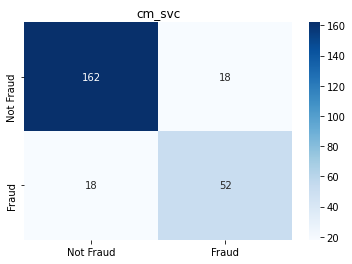

In [47]:
# display confusion matrix with dataframe
cm_svc = pd.DataFrame(cm_svc)

cm_svc = sns.heatmap(cm_svc, cmap='Blues', annot=True, fmt='' ,xticklabels=['Not Fraud','Fraud'], yticklabels=['Not Fraud','Fraud']).set_title('cm_svc')

## Conclusion



If we see confusion matrix for each method:

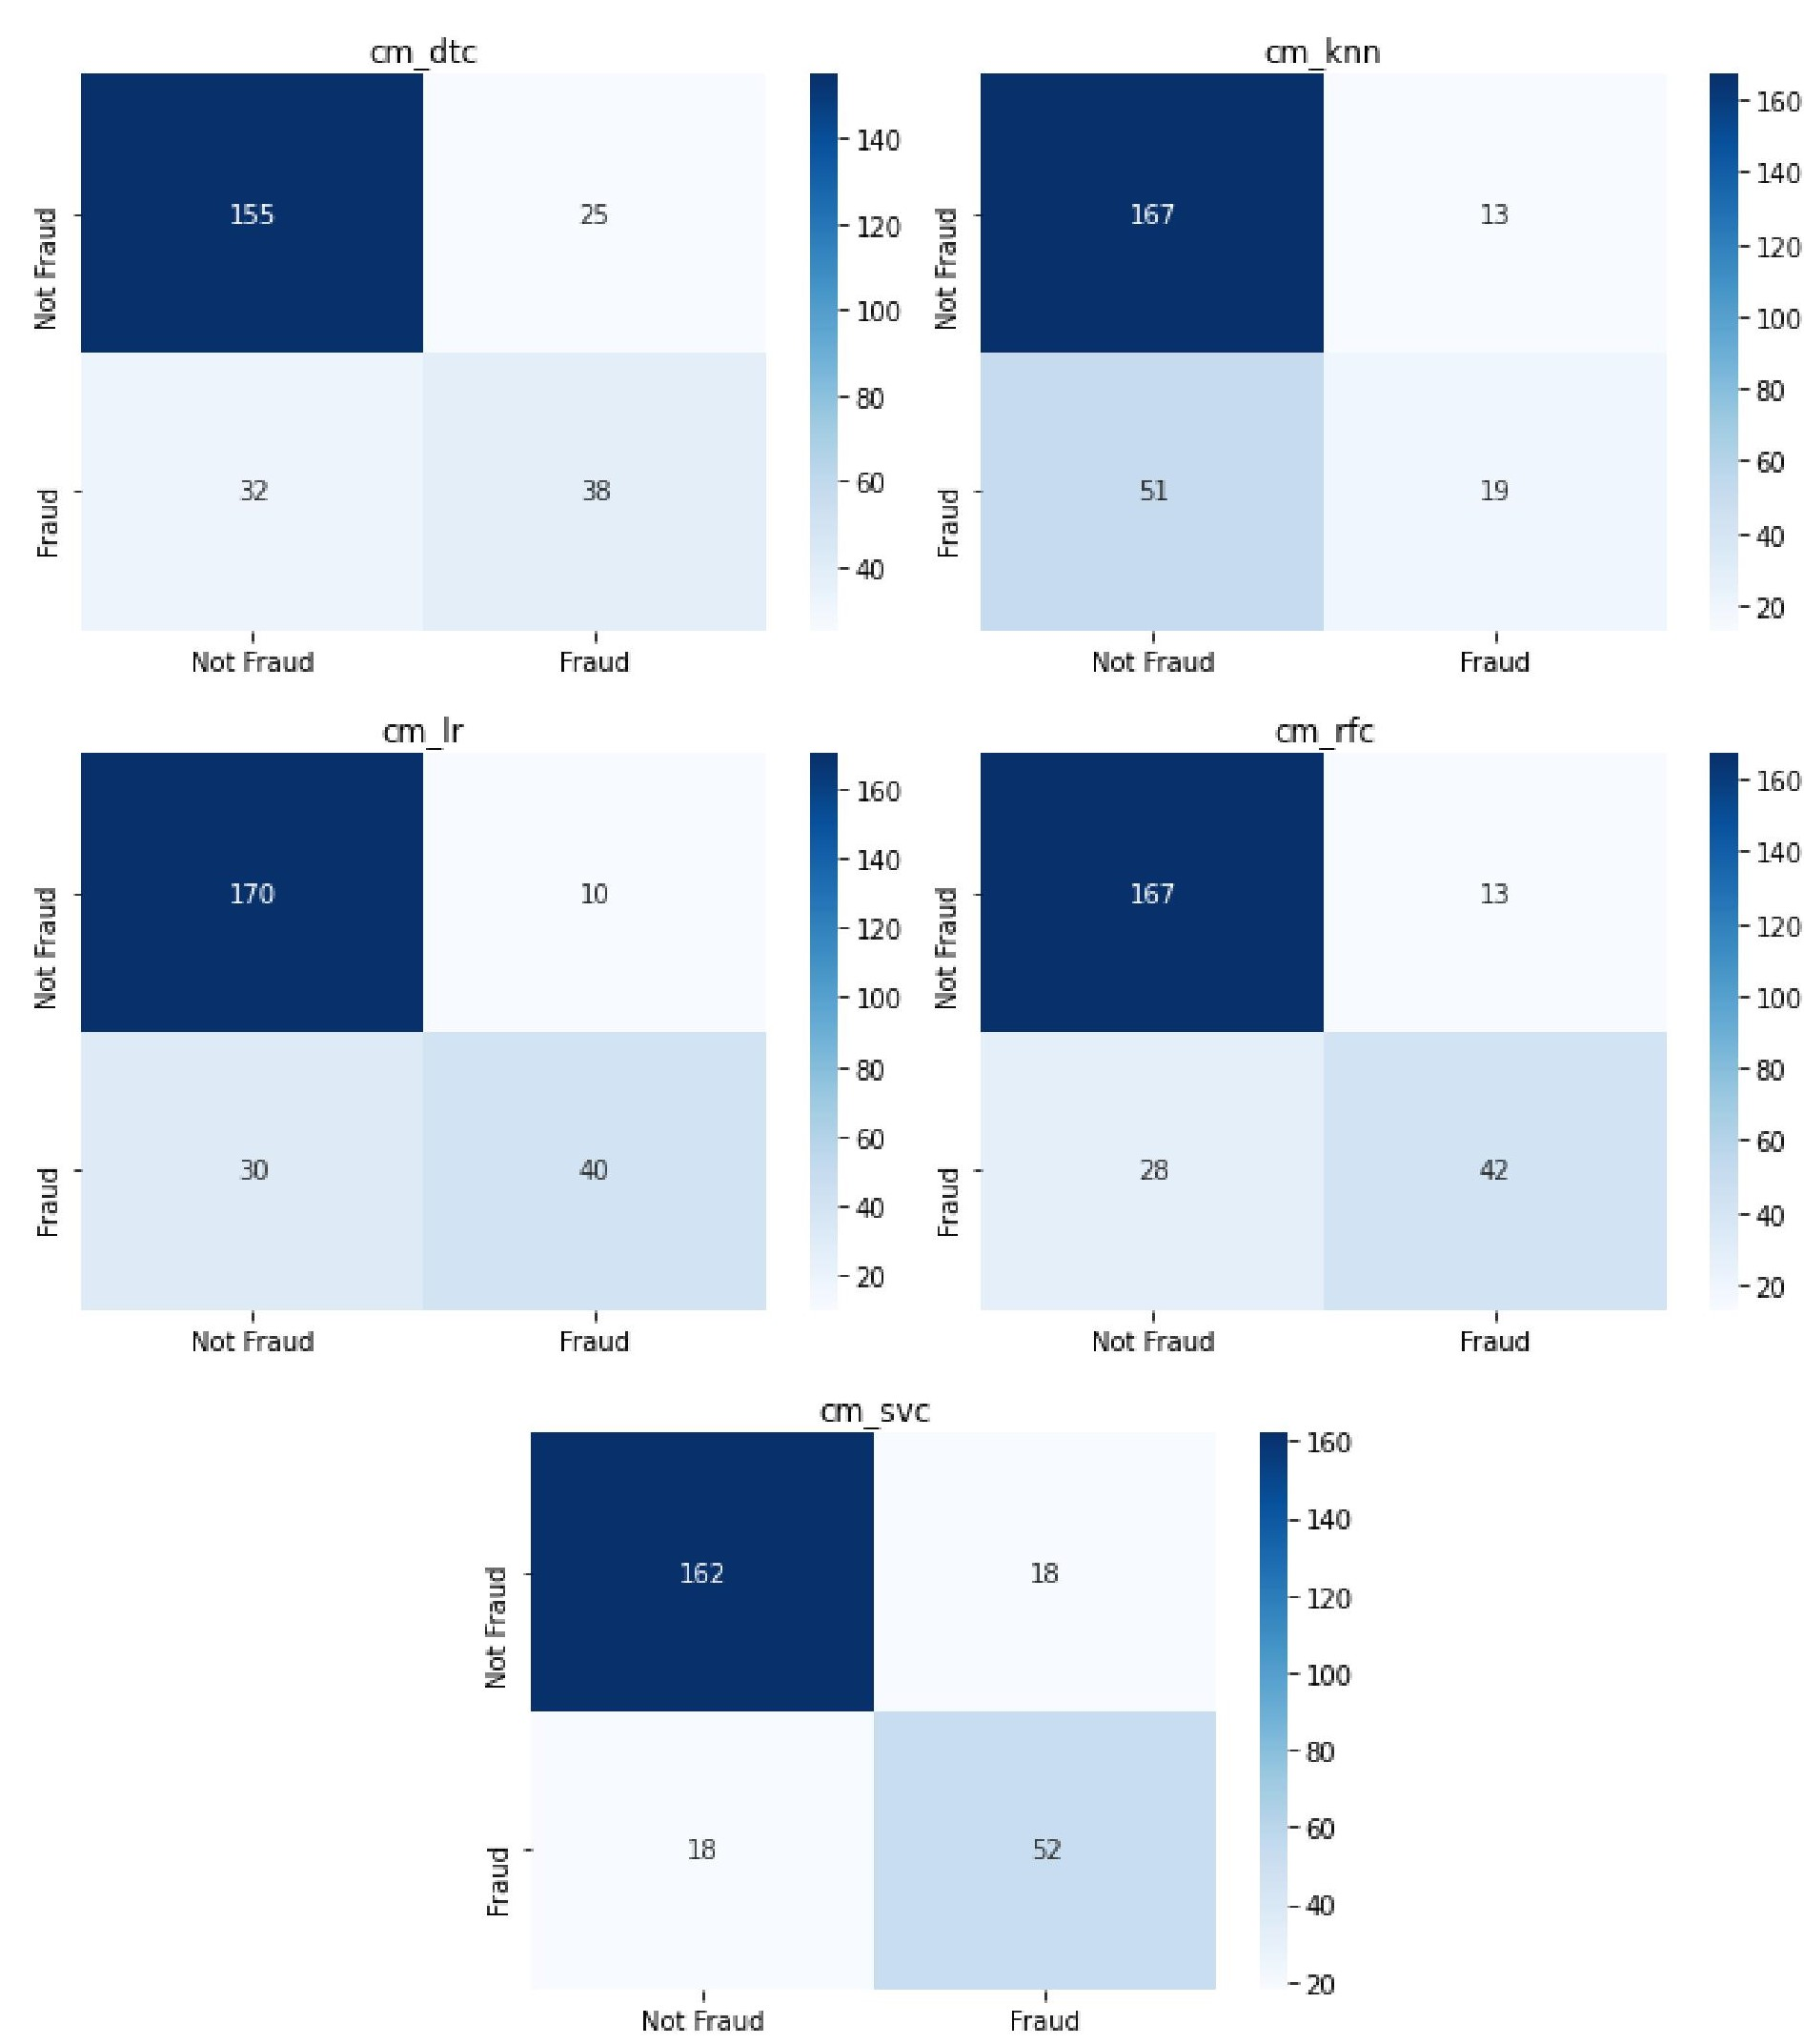

we can see with svc has the best confusion matrix because has the least false negative or false positive in its matrix. Next we can compare the accuracy and the score each method.

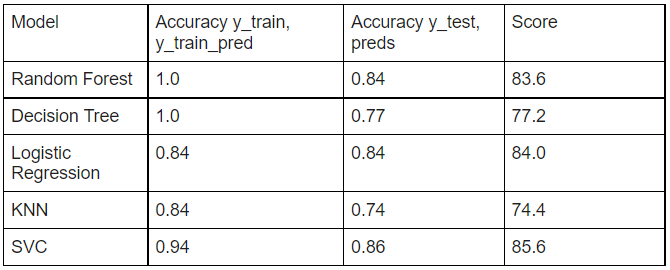

To avoid underfitting or overfitting, we can use the logistic regression method because the accuracy between train data and test data is no different. Also, if we look score each method, we can use SVC method because the method has the highest score than other 